In [0]:
import cv2
import numpy as np

In [0]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [181]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

path = '/content/gdrive/My Drive/Colab Notebooks/The Complete Self-Driving Car Course - Applied Deep Learning/test_image.jpg'

Mounted at /content/gdrive


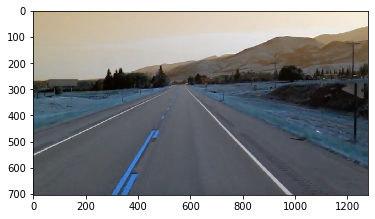

In [182]:
# Read in the image
image = cv2.imread(path)
# print(image.shape)         (704, 1279, 3)
plt.imshow(image)

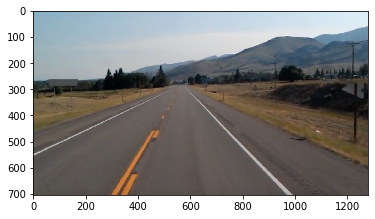

In [183]:
# as opencv loads in BGR format by default, we want to show it in RGB.
colored_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# print(new_image.shape)         (704, 1279, 3)
plt.imshow(colored_image)

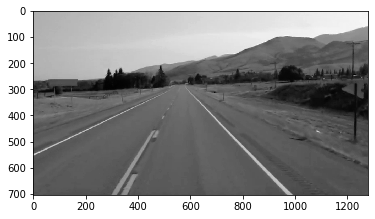

In [184]:
gray_image = cv2.cvtColor(colored_image, cv2.COLOR_RGB2GRAY)
# print(new_image.shape)      (704, 1279)
plt.imshow(gray_image, cmap='gray')

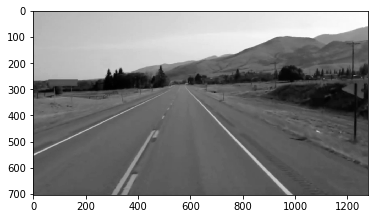

In [185]:
# To reduce noise & smoothen image. Image noise can create false edges & ultimately affect edge detection
# The below line of code applies a gaussian blur by convolving gray scale image with a kernel of gaussian values (usually of size 5x5) thus filtering 
# noise & smoothening our image.
blur = cv2.GaussianBlur(gray_image, (5,5), 0)      # deviation=0
# print(blur.shape)            (704, 1279)
plt.imshow(blur, cmap='gray')

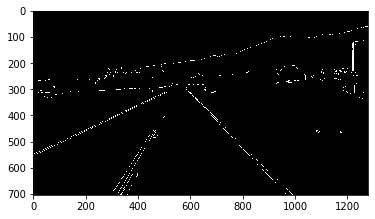

In [186]:
# The above step was actually optional since the canny function is going to internally apply the 5x5 gaussian
# The canny function performs a derivative on our function in both x & y directions, thereby measuring change in intensity wrt adjacent pixels
# The strongest gradient is traced as a series of white pixels
# upper threshold: if gradient is larger than upper threshold then it is accepted as an edge pixel
# lower threshold: if gradient is below the lower threshold then it is rejected
# if the gradient is b/w the thresholds then it will be accepted only if it is connected to a strong edge. Recommended ration of 1:2 or 1:3
canny = cv2.Canny(blur, 50, 150)
# print(canny.shape)       (704, 1279)
plt.imshow(canny, cmap='gray')

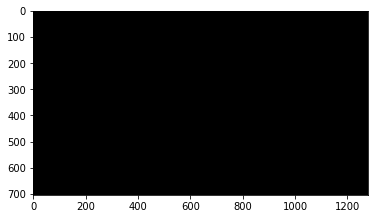

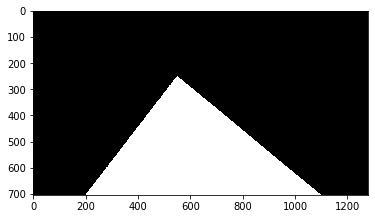

In [187]:
height = canny.shape[0]       # 704
polygons = np.array([[(200, height), (1100, height), (550, 250)]])
# polygons
# array([[[ 200,  704],
#         [1100,  704],
#         [ 550,  250]]])
# polygons.shape              (1, 3, 2)

mask = np.zeros_like(canny)
# mask.shape                  (704, 1279)
plt.imshow(mask, cmap='gray')
plt.show()

cv2.fillPoly(mask, polygons, 255)    # fills mask with polygons. 3rd argument specifies color of our polygon which we keep completely white
plt.imshow(mask, cmap='gray')
plt.show()

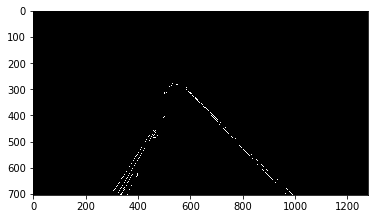

In [188]:
cropped_image = cv2.bitwise_and(canny, mask)
# print(cropped_image.shape)              (704, 1279)
plt.imshow(cropped_image, cmap='gray')

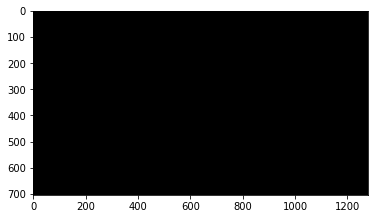

In [189]:
line_image = np.zeros_like(colored_image)
plt.imshow(line_image)

[[658 371 755 468]] (1, 4)
[658 371 755 468] (4,)

[[696 417 747 470]] (1, 4)
[696 417 747 470] (4,)

[[299 701 386 567]] (1, 4)
[299 701 386 567] (4,)

[[747 472 969 702]] (1, 4)
[747 472 969 702] (4,)

[[331 684 452 481]] (1, 4)
[331 684 452 481] (4,)

[[588 299 660 371]] (1, 4)
[588 299 660 371] (4,)

[[811 526 868 582]] (1, 4)
[811 526 868 582] (4,)

[[615 332 704 424]] (1, 4)
[615 332 704 424] (4,)

[[900 613 976 689]] (1, 4)
[900 613 976 689] (4,)

[[401 542 454 461]] (1, 4)
[401 542 454 461] (4,)

[[351 675 379 625]] (1, 4)
[351 675 379 625] (4,)

[[704 418 839 553]] (1, 4)
[704 418 839 553] (4,)

[[592 304 704 416]] (1, 4)
[592 304 704 416] (4,)

[[358 609 409 532]] (1, 4)
[358 609 409 532] (4,)



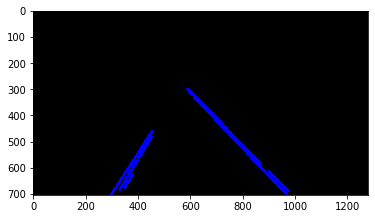

In [190]:
# The 2nd & 3rd arguments specify the resolution of the hough accumulator array (2 dimensional array which contains the bins that we are going to use to 
# collect the votes. Each bin represents a distinctive value of rho & theta. We use precison of 2 pixels, precision of 1 degree radians). 
# The 4th argument is the threshold to find & display the lines from a series of dots. It's the minimum number of votes needed to accept a candiate line.
# The 5th argument is just a placeholder array.
# The 6th argument is the length of the line in pixels that we will accept into the output. So basically any detected lines traced by less than 40 pixels
# are rejected.
# The 7th argument indicates the maximum distance in pixels b/w segmented lines which we will allow to be connected into a single line instead of them
# being broken up.
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
for line in lines:
  print(line, line.shape)
  line = line.reshape(4)
  print(line, line.shape)
  print('')
  x1, y1, x2, y2 = line

  cv2.line(line_image, (x1,y1), (x2,y2), (0,0,255), 10)      # RGB so blue color, line thickness = 10

plt.imshow(line_image)

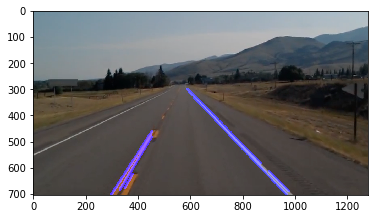

In [191]:
combo_image = cv2.addWeighted(colored_image, 0.8, line_image, 1, 1)   # Weight of 0.8 to colored_image & 1 to line_image
plt.imshow(combo_image)

In [192]:
left_fit = []
right_fit = []
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
for line in lines:
  x1, y1, x2, y2 = line.reshape(4)
  parameters = np.polyfit((x1,x2), (y1,y2), 1)
  slope, intercept = parameters

  if slope < 0:
    left_fit.append((slope, intercept))
  else:
    right_fit.append((slope, intercept))

left_fit_average = np.average(left_fit, axis=0)
right_fit_average = np.average(right_fit, axis=0)

print(left_fit_average, 'left')
print(right_fit_average, 'right')

slope, intercept = left_fit_average
y1 = colored_image.shape[0]
y2 = int(y1*(3/5))
x1 = int((y1-intercept)/slope)
x2 = int((y2-intercept)/slope)
left = np.array([x1, y1, x2, y2])

slope, intercept = right_fit_average
y1 = colored_image.shape[0]
y2 = int(y1*(3/5))
x1 = int((y1-intercept)/slope)
x2 = int((y2-intercept)/slope)
right = np.array([x1, y1, x2, y2])

[  -1.60834719 1201.39747201] left
[   1.0101573  -291.07947816] right


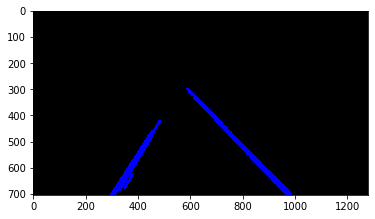

In [193]:
lines = np.array([left, right])
# print(lines) 
# [[309 704 484 422]
#  [985 704 705 422]]

# print(lines.shape)                (2, 4)

for x1, y1, x2, y2 in lines:
  cv2.line(line_image, (x1,y1), (x2,y2), (0,0,255), 10)      # RGB so blue color, line thickness = 10

plt.imshow(line_image)

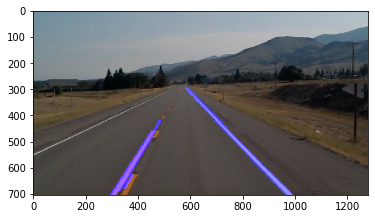

In [194]:
combo_image = cv2.addWeighted(colored_image, 0.8, line_image, 1, 1)   # Weight of 0.8 to colored_image & 1 to line_image
plt.imshow(combo_image)